<a href="https://colab.research.google.com/github/BuczynskiRafal/pipe_calculations/blob/main/fuzzy%20logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install packages

In [1]:
!pip install -U scikit-fuzzy
!pip install rainwater_drainage_calculations-0.1.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.1 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=04beab9cb7704f59e8671d1f7251a4e5a3d1fe7c91ab7a00458cfd63d50d7092
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./rainwater_drainage_calculations-0.1.tar.gz
  Created wheel for rainwater-drainage-calculations: filename=rainwater_drainage_calculations-0.1-py3-none-any.whl size=6353 sha256=fcd1f00ee3ad3c6367db30eb3e89e6d162b28469385519e0948ff6b16750325c
  Stored in directory: /root/.cache/pip/wheels/e2/43/f1/ced1796fe70b639e8a7490c7715bc2e7773cde56b8080b086f
Successfully built rainwater-drainage-calculations


# Imports


In [2]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
from numpy.core._multiarray_umath  import  ndarray
from matplotlib import cm
from rainwater_drainage_calculations import calculations as pipe

# Insert data


In [3]:
raw_data = pd.read_excel('pipes_before_validation.xlsx')
data = raw_data.copy()
df = pd.DataFrame(data)
df.rename(columns=df.iloc[0]).drop(df.index[0])
df.head(10)
df['Flow [l/s]'] = df['Flow [l/s]'].astype(np.float64)
df.head()

,Lp.,Start node,End node,Flow [l/s],Land elevation [m],Channel bottom [m],Diameter [m],pipe dip [m],Length [m],slope [‰]
0,1,W1,S1,26.0,149.08,147.28,0.2,1.80,8.1,50.560000
1,2,W2,S1,18.0,149.06,147.96,0.2,1.10,8.2,109.756098
2,3,S1,S2,44.0,149.32,146.47,0.6,2.85,27.1,2.214022
3,4,W3,S2,24.0,148.86,147.12,0.2,1.74,11.1,24.324324
4,5,W4,S2,19.0,148.82,147.80,0.2,1.02,5.6,35.714286


In [4]:
df.shape


(20, 10)

# Calculate pipe filling - h [m]


In [5]:
df['h [m]'] = df.apply(lambda x: pipe.calc_h(q=x['Flow [l/s]'], d=x['Diameter [m]'], i=x['slope [‰]']), axis=1)
df.head(10)

,Lp.,Start node,End node,Flow [l/s],Land elevation [m],Channel bottom [m],Diameter [m],pipe dip [m],Length [m],slope [‰],h [m]
0,1,W1,S1,26.0,149.08,147.28,0.20,1.80,8.10,50.560000,0.0822
1,2,W2,S1,18.0,149.06,147.96,0.20,1.10,8.20,109.756098,0.0552
2,3,S1,S2,44.0,149.32,146.47,0.60,2.85,27.10,2.214022,0.1584
3,4,W3,S2,24.0,148.86,147.12,0.20,1.74,11.10,24.324324,0.0965
4,5,W4,S2,19.0,148.82,147.80,0.20,1.02,5.60,35.714286,0.0761
5,6,S2,S3,87.0,148.92,146.41,0.60,2.51,38.10,1.574803,0.2479
6,7,W5,S3,16.0,148.61,146.82,0.25,1.79,16.14,10.383387,0.0878
7,8,W6,S3,15.0,148.61,146.85,0.25,1.76,12.52,10.383387,0.0849
8,9,S3,S4,118.0,148.66,146.24,0.60,2.42,40.00,4.250000,0.2234
9,10,S4a,S4b,14.0,148.48,145.96,0.40,2.52,20.90,1.000000,0.1254


# Calculate max pipe filling - h max [m]


In [6]:
df['h max [m]'] = df.apply(lambda x: pipe.max_h(d=x['Diameter [m]']), axis=1)
df.head()


,Lp.,Start node,End node,Flow [l/s],Land elevation [m],Channel bottom [m],Diameter [m],pipe dip [m],Length [m],slope [‰],h [m],h max [m]
0,1,W1,S1,26.0,149.08,147.28,0.2,1.80,8.1,50.560000,0.0822,0.12
1,2,W2,S1,18.0,149.06,147.96,0.2,1.10,8.2,109.756098,0.0552,0.12
2,3,S1,S2,44.0,149.32,146.47,0.6,2.85,27.1,2.214022,0.1584,0.45
3,4,W3,S2,24.0,148.86,147.12,0.2,1.74,11.1,24.324324,0.0965,0.12
4,5,W4,S2,19.0,148.82,147.80,0.2,1.02,5.6,35.714286,0.0761,0.12


# Calculate min slope - slope min [‰]


In [7]:
df['slope min [‰]'] = df.apply(lambda x: pipe.min_slope(h=x['h [m]'], d=x['Diameter [m]']), axis=1)
df.head()

,Lp.,Start node,End node,Flow [l/s],Land elevation [m],Channel bottom [m],Diameter [m],pipe dip [m],Length [m],slope [‰],h [m],h max [m],slope min [‰]
0,1,W1,S1,26.0,149.08,147.28,0.2,1.80,8.1,50.560000,0.0822,0.12,5.000000
1,2,W2,S1,18.0,149.06,147.96,0.2,1.10,8.2,109.756098,0.0552,0.12,7.837630
2,3,S1,S2,44.0,149.32,146.47,0.6,2.85,27.1,2.214022,0.1584,0.45,2.712511
3,4,W3,S2,24.0,148.86,147.12,0.2,1.74,11.1,24.324324,0.0965,0.12,5.000000
4,5,W4,S2,19.0,148.82,147.80,0.2,1.02,5.6,35.714286,0.0761,0.12,5.000000


# Calculate max slope - slope max [‰]


In [8]:
df['slope max [‰]'] = df.apply(lambda x: pipe.max_slope(d=x['Diameter [m]']), axis=1)
df.head()

,Lp.,Start node,End node,Flow [l/s],Land elevation [m],Channel bottom [m],Diameter [m],pipe dip [m],Length [m],slope [‰],h [m],h max [m],slope min [‰],slope max [‰]
0,1,W1,S1,26.0,149.08,147.28,0.2,1.80,8.1,50.560000,0.0822,0.12,5.000000,230.0
1,2,W2,S1,18.0,149.06,147.96,0.2,1.10,8.2,109.756098,0.0552,0.12,7.837630,230.0
2,3,S1,S2,44.0,149.32,146.47,0.6,2.85,27.1,2.214022,0.1584,0.45,2.712511,52.5
3,4,W3,S2,24.0,148.86,147.12,0.2,1.74,11.1,24.324324,0.0965,0.12,5.000000,230.0
4,5,W4,S2,19.0,148.82,147.80,0.2,1.02,5.6,35.714286,0.0761,0.12,5.000000,230.0


# Calculate velocity


In [9]:
df['v [m]'] = df.apply(lambda x: pipe.calc_velocity(h=x['h [m]'], d=x['Diameter [m]'], i=x['slope [‰]']), axis=1)
df.head(10)

,Lp.,Start node,End node,Flow [l/s],Land elevation [m],Channel bottom [m],Diameter [m],pipe dip [m],Length [m],slope [‰],h [m],h max [m],slope min [‰],slope max [‰],v [m]
0,1,W1,S1,26.0,149.08,147.28,0.20,1.80,8.10,50.560000,0.0822,0.12,5.000000,230.0,2.146177
1,2,W2,S1,18.0,149.06,147.96,0.20,1.10,8.20,109.756098,0.0552,0.12,7.837630,230.0,2.563153
2,3,S1,S2,44.0,149.32,146.47,0.60,2.85,27.10,2.214022,0.1584,0.45,2.712511,52.5,0.738516
3,4,W3,S2,24.0,148.86,147.12,0.20,1.74,11.10,24.324324,0.0965,0.12,5.000000,230.0,1.603442
4,5,W4,S2,19.0,148.82,147.80,0.20,1.02,5.60,35.714286,0.0761,0.12,5.000000,230.0,1.736123
5,6,S2,S3,87.0,148.92,146.41,0.60,2.51,38.10,1.574803,0.2479,0.45,1.666667,52.5,0.789887
6,7,W5,S3,16.0,148.61,146.82,0.25,1.79,16.14,10.383387,0.0878,0.15,4.000000,167.5,1.042486
7,8,W6,S3,15.0,148.61,146.85,0.25,1.76,12.52,10.383387,0.0849,0.15,4.000000,167.5,1.024273
8,9,S3,S4,118.0,148.66,146.24,0.60,2.42,40.00,4.250000,0.2234,0.45,1.666667,52.5,1.232127
9,10,S4a,S4b,14.0,148.48,145.96,0.40,2.52,20.90,1.000000,0.1254,0.28,2.500000,90.0,0.416628


# Validate pipe dip


In [10]:
df['dip is valid'] = df.apply(lambda x: 1 if x['pipe dip [m]'] >=1.2 else 0, axis=1)
print(f"Row count with invalid pipe dip: {len(df[df['dip is valid'] == 0])}")
df[df['dip is valid'] == 0]

Row count with invalid pipe dip: 3


,Lp.,Start node,End node,Flow [l/s],Land elevation [m],Channel bottom [m],Diameter [m],pipe dip [m],Length [m],slope [‰],h [m],h max [m],slope min [‰],slope max [‰],v [m],dip is valid
1,2,W2,S1,18.0,149.06,147.96,0.2,1.10,8.2,109.756098,0.0552,0.12,7.837630,230.0,2.563153,0
4,5,W4,S2,19.0,148.82,147.80,0.2,1.02,5.6,35.714286,0.0761,0.12,5.000000,230.0,1.736123,0
12,13,W8,S4,18.0,148.14,146.99,0.2,1.15,5.3,194.339623,0.0478,0.12,8.862464,230.0,3.142397,0


# Validate slope


In [11]:
df['slope is valid'] = df.apply(lambda x: 1 if x['slope max [‰]'] >= x['slope [‰]'] >= x['slope min [‰]'] else 0, axis=1)
print(f"Row count with invalid pipe slope: {len(df[df['slope is valid'] == 0])}")
df[df['slope is valid'] == 0]

Row count with invalid pipe slope: 4


,Lp.,Start node,End node,Flow [l/s],Land elevation [m],Channel bottom [m],Diameter [m],pipe dip [m],Length [m],slope [‰],h [m],h max [m],slope min [‰],slope max [‰],v [m],dip is valid,slope is valid
2,3,S1,S2,44.0,149.32,146.47,0.6,2.85,27.1,2.214022,0.1584,0.45,2.712511,52.5,0.738516,1,0
5,6,S2,S3,87.0,148.92,146.41,0.6,2.51,38.1,1.574803,0.2479,0.45,1.666667,52.5,0.789887,1,0
9,10,S4a,S4b,14.0,148.48,145.96,0.4,2.52,20.9,1.000000,0.1254,0.28,2.500000,90.0,0.416628,1,0
19,20,S7,S7,244.0,147.88,145.30,0.6,2.58,NaN,NaN,0.0001,0.45,3750.291695,52.5,NaN,1,0


# Validate velocity


In [12]:
df['v is valid'] = df.apply(lambda x: 1 if 5 >= x['v [m]'] >= 0.8 else 0, axis=1)
print(f"Row count with invalid pipe velocity: {len(df[df['v is valid'] == 0])}")
df[df['v is valid'] == 0]

Row count with invalid pipe velocity: 4


,Lp.,Start node,End node,Flow [l/s],Land elevation [m],Channel bottom [m],Diameter [m],pipe dip [m],Length [m],slope [‰],h [m],h max [m],slope min [‰],slope max [‰],v [m],dip is valid,slope is valid,v is valid
2,3,S1,S2,44.0,149.32,146.47,0.6,2.85,27.1,2.214022,0.1584,0.45,2.712511,52.5,0.738516,1,0,0
5,6,S2,S3,87.0,148.92,146.41,0.6,2.51,38.1,1.574803,0.2479,0.45,1.666667,52.5,0.789887,1,0,0
9,10,S4a,S4b,14.0,148.48,145.96,0.4,2.52,20.9,1.000000,0.1254,0.28,2.500000,90.0,0.416628,1,0,0
19,20,S7,S7,244.0,147.88,145.30,0.6,2.58,NaN,NaN,0.0001,0.45,3750.291695,52.5,NaN,1,0,0


# Validate pipe filling - h [m]


In [13]:
df['h is valid'] = df.apply(lambda x: 1 if x['h [m]'] <= x['h max [m]'] else 0, axis=1)
print(f"Row count with invalid pipe filling: {len(df[df['h is valid'] == 0])}")
df.head()

Row count with invalid pipe filling: 0


,Lp.,Start node,End node,Flow [l/s],Land elevation [m],Channel bottom [m],Diameter [m],pipe dip [m],Length [m],slope [‰],h [m],h max [m],slope min [‰],slope max [‰],v [m],dip is valid,slope is valid,v is valid,h is valid
0,1,W1,S1,26.0,149.08,147.28,0.2,1.80,8.1,50.560000,0.0822,0.12,5.000000,230.0,2.146177,1,1,1,1
1,2,W2,S1,18.0,149.06,147.96,0.2,1.10,8.2,109.756098,0.0552,0.12,7.837630,230.0,2.563153,0,1,1,1
2,3,S1,S2,44.0,149.32,146.47,0.6,2.85,27.1,2.214022,0.1584,0.45,2.712511,52.5,0.738516,1,0,0,1
3,4,W3,S2,24.0,148.86,147.12,0.2,1.74,11.1,24.324324,0.0965,0.12,5.000000,230.0,1.603442,1,1,1,1
4,5,W4,S2,19.0,148.82,147.80,0.2,1.02,5.6,35.714286,0.0761,0.12,5.000000,230.0,1.736123,0,1,1,1


# Implementation of fuzzy logic for pipe slope

Assumption:
* v_max = 5 [m/s]


In [14]:
# wejścia do analizy dla DN 200
h_max = pipe.max_h(0.2)

# dla pojedyńczego przypadku
d = 0.2
i_min = 1 / d
i_max = pipe.max_slope(d=d)
slope = ctrl.Antecedent(np.arange(i_min, i_max + 1, 1), 'slope')
v_min = 0
v_max = 5
velocity = ctrl.Antecedent(np.arange(v_min, v_max + 0.1, 0.1), 'velocity')
diameter = ctrl.Consequent(np.arange(1, 101, 1), 'diameter')

# Populate slope with membership functions.



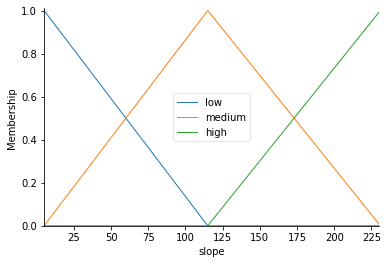

In [15]:
slope['low'] = fuzz.trimf(slope.universe, [i_min, i_min, i_max / 2])
slope['medium'] = fuzz.trimf(slope.universe, [i_min, i_max / 2, i_max + 1])
slope['high'] = fuzz.trimf(slope.universe, [i_max / 2, i_max + 1, i_max + 1])

slope.view()

# Populate velocity with membership functions.


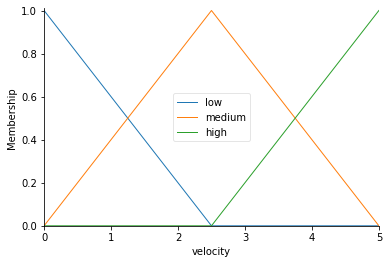

In [16]:
velocity['low'] = fuzz.trimf(velocity.universe, [v_min, v_min, 0.5 * v_max])
velocity['medium'] = fuzz.trimf(velocity.universe, [v_min, 0.5 * v_max, v_max])
velocity['high'] = fuzz.trimf(velocity.universe, [0.5 * v_max, v_max, v_max])

velocity.view()

# Populate dimension 

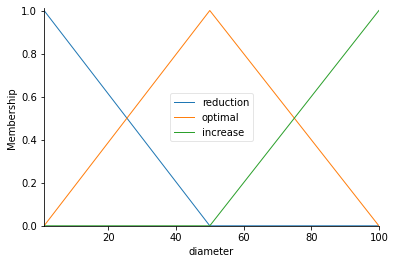

In [17]:
diameter['reduction'] = fuzz.trimf(diameter.universe, [1, 1, 50])
diameter['optimal'] = fuzz.trimf(diameter.universe, [1, 50, 100])
diameter['increase'] = fuzz.trimf(diameter.universe, [50, 100, 100])

diameter.view()

# Define rules


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4d7d49cd50>)

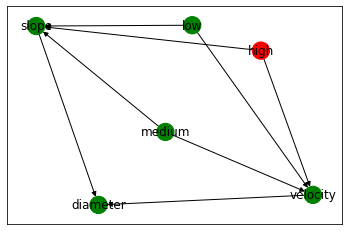

In [18]:
r1 = ctrl.Rule(slope['low'] & velocity['low'] , diameter['reduction'])
r2 = ctrl.Rule(slope['low'] & velocity['medium'], diameter['reduction'])
r4 = ctrl.Rule(slope['medium'] & velocity['low'], diameter['reduction'])
r8 = ctrl.Rule(slope['high'] & velocity['low'], diameter['reduction'])
r9 = ctrl.Rule(slope['high'] & velocity['medium'], diameter['reduction'])

r3 = ctrl.Rule(slope['medium'] & velocity['medium'], diameter['optimal'])

r5 = ctrl.Rule(slope['low'] & velocity['high'], diameter['increase'])
r6 = ctrl.Rule(slope['medium'] & velocity['high'], diameter['increase'])
r7 = ctrl.Rule(slope['high'] & velocity['high'], diameter['increase'])
r2.view_n()

# Create model

['__bool__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']


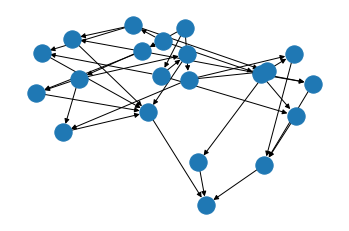

In [19]:
# Model  rozmyty w oparciu  o  trzy  reguły
diameter_ctrl = ctrl.ControlSystem([r1, r2, r3, r4, r5, r6, r7, r8, r9])
# print(diameter_ctrl.view_n())
print(dir(diameter_ctrl.view()))

# Obliczenie wyjść (symulacja systemu) dla obiektu diameter_ctrl
diameters = ctrl.ControlSystemSimulation(diameter_ctrl)
# diameter.view()

# Zastosowanie modelu 

21.098735323603545


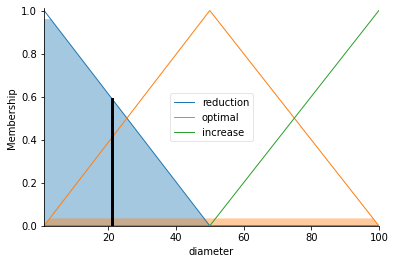

In [21]:
diameters.input['slope'] = 227
diameters.input['velocity'] = 0.1

diameters.compute()
print(diameters.output['diameter'])
diameter.view(sim=diameters)

In [22]:
# defuzzification


In [23]:
s = np.arange(i_min, i_max + 1, 1)
v = np.arange(v_min, v_max + 0.1, 0.1)
s, v = np.meshgrid(s, v)

pred_val: np.ndarray = np.zeros(shape=(len(v), len(s[1])))

In [ ]:
# for i in range(len(s[1] - 5)):
#     for j in range(len(v)):
#         diameters.input['slope'] = i_min + i
#         diameters.input['velocity'] = v_min + j / 10
#         # print(f"s: {i_min + i}, v: {v_min + j / 10}")
#         diameters.compute()
#         # print(f" output: {diameters.output['diameter']}")
#         # print(30 * '=')
#         pred_val[j][i] = diameters.output['diameter']

In [ ]:
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# surf = ax.plot_surface(s, v, pred_val, cmap=cm.coolwarm, linewidth=1, antialiased=False)
# fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.show()

In [24]:
s = np.arange(i_min, i_max + 1, 1)
v = np.arange(v_min, v_max + 0.1, 0.1)
s, v = np.meshgrid(s, v)

for i in range(len(s[1] - 5)):
    for j in range(len(v)):
        diameters.input['slope'] = i_min + i
        diameters.input['velocity'] = v_min + j / 10
        diameters.compute()
        pred_val[j][i] = diameters.output['diameter']


In [25]:
# Dataframe z wartościami 
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=[go.Surface(x=s, y=v, z=pred_val)])
fig.update_layout(title='Diameter evaluation using the fuzzy logic model',
                  scene=dict(
                      xaxis_title='Slope [‰]',
                      yaxis_title='Velocity [m/s]',
                      zaxis_title='Diameter evaluation'),
                  autosize=True,
                  width=900, height=900,)
                #   margin=dict(l=65, r=50, b=65, t=90))
fig.show()

# automate
  

In [26]:
def fuzzy_logic(s, v, d):
    h_max = pipe.max_h(d)
    i_min = pipe.min_slope(h_max, d)
    i_max = pipe.max_slope(d)
    slope = ctrl.Antecedent(np.arange(i_min, i_max + 1, 1), 'slope')
    v_min = 0
    v_max = 5
    velocity = ctrl.Antecedent(np.arange(v_min, v_max + 0.1, 0.1), 'velocity')
    diameter = ctrl.Consequent(np.arange(1, 101, 1), 'diameter')

    # Populate slope with membership functions.
    slope['low'] = fuzz.trimf(slope.universe, [i_min, i_min, i_max / 2])
    slope['medium'] = fuzz.trimf(slope.universe, [i_min, i_max / 2, i_max + 1])
    slope['high'] = fuzz.trimf(slope.universe, [i_max / 2, i_max + 1, i_max + 1])

    # Populate velocity with membership functions.
    velocity['low'] = fuzz.trimf(velocity.universe, [v_min, v_min, 0.5 * v_max])
    velocity['medium'] = fuzz.trimf(velocity.universe, [v_min, 0.5 * v_max, v_max])
    velocity['high'] = fuzz.trimf(velocity.universe, [0.5 * v_max, v_max, v_max])

    # Populate diamter
    diameter['reduction'] = fuzz.trimf(diameter.universe, [1, 1, 50])
    diameter['optimal'] = fuzz.trimf(diameter.universe, [1, 50, 100])
    diameter['increase'] = fuzz.trimf(diameter.universe, [50, 100, 100])

    # Define rules
    r1 = ctrl.Rule(slope['low'] & velocity['low'] , diameter['reduction'])
    r2 = ctrl.Rule(slope['low'] & velocity['medium'], diameter['reduction'])
    r4 = ctrl.Rule(slope['medium'] & velocity['low'], diameter['reduction'])
    r8 = ctrl.Rule(slope['high'] & velocity['low'], diameter['reduction'])
    r9 = ctrl.Rule(slope['high'] & velocity['medium'], diameter['reduction'])

    r3 = ctrl.Rule(slope['medium'] & velocity['medium'], diameter['optimal'])

    r5 = ctrl.Rule(slope['low'] & velocity['high'], diameter['increase'])
    r6 = ctrl.Rule(slope['medium'] & velocity['high'], diameter['increase'])
    r7 = ctrl.Rule(slope['high'] & velocity['high'], diameter['increase'])

    diameter_ctrl = ctrl.ControlSystem([r1, r2, r3, r4, r5, r6, r7, r8, r9])

    # compute
    diameters = ctrl.ControlSystemSimulation(diameter_ctrl)

    # calculate
    diameters.input['slope'] = s
    diameters.input['velocity'] = v

    diameters.compute()
    return diameters.output['diameter']

print(fuzzy_logic(s=20, v=1, d=0.2))


32.23415721908444


# Clasters

(1,)


Text(0.5, 1.0, 'Test data: 200 points x3 clusters.')

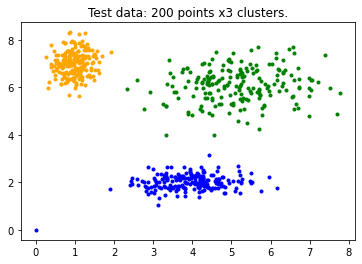

In [29]:
# test
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)

for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')

In [61]:

# dla pojedyńczego przypadku
d = 0.2
i_min = 1 / d
i_max = pipe.max_slope(d=d)
slope = ctrl.Antecedent(np.arange(i_min, i_max + 1, 1), 'slope')
v_min = 0
v_max = 5
velocity = ctrl.Antecedent(np.arange(v_min, v_max + 0.1, 0.1), 'velocity')
diameter = ctrl.Consequent(np.arange(1, 101, 1), 'diameter')

s = np.arange(i_min, i_max + 1, 1)
v = np.arange(v_min, v_max + 0.1, 0.1)
s, v = np.meshgrid(s, v)

# pred_val: np.ndarray = np.zeros(shape=(len(v), len(s[1])))

points = []
for i in range(len(s[1] - 5)):
    for j in range(len(v)):
        points.append([i_min + i, j / 10])

print(points)
import matplotlib.pyplot as plt
plt.scatter(points[:,0], points[:,1])



[[5.0, 0.0], [5.0, 0.1], [5.0, 0.2], [5.0, 0.3], [5.0, 0.4], [5.0, 0.5], [5.0, 0.6], [5.0, 0.7], [5.0, 0.8], [5.0, 0.9], [5.0, 1.0], [5.0, 1.1], [5.0, 1.2], [5.0, 1.3], [5.0, 1.4], [5.0, 1.5], [5.0, 1.6], [5.0, 1.7], [5.0, 1.8], [5.0, 1.9], [5.0, 2.0], [5.0, 2.1], [5.0, 2.2], [5.0, 2.3], [5.0, 2.4], [5.0, 2.5], [5.0, 2.6], [5.0, 2.7], [5.0, 2.8], [5.0, 2.9], [5.0, 3.0], [5.0, 3.1], [5.0, 3.2], [5.0, 3.3], [5.0, 3.4], [5.0, 3.5], [5.0, 3.6], [5.0, 3.7], [5.0, 3.8], [5.0, 3.9], [5.0, 4.0], [5.0, 4.1], [5.0, 4.2], [5.0, 4.3], [5.0, 4.4], [5.0, 4.5], [5.0, 4.6], [5.0, 4.7], [5.0, 4.8], [5.0, 4.9], [5.0, 5.0], [6.0, 0.0], [6.0, 0.1], [6.0, 0.2], [6.0, 0.3], [6.0, 0.4], [6.0, 0.5], [6.0, 0.6], [6.0, 0.7], [6.0, 0.8], [6.0, 0.9], [6.0, 1.0], [6.0, 1.1], [6.0, 1.2], [6.0, 1.3], [6.0, 1.4], [6.0, 1.5], [6.0, 1.6], [6.0, 1.7], [6.0, 1.8], [6.0, 1.9], [6.0, 2.0], [6.0, 2.1], [6.0, 2.2], [6.0, 2.3], [6.0, 2.4], [6.0, 2.5], [6.0, 2.6], [6.0, 2.7], [6.0, 2.8], [6.0, 2.9], [6.0, 3.0], [6.0, 3.1], [6.

TypeError: ignored

In [59]:
p = np.random.uniform(-20, 20, size=(4,2))
print(p)

[[ -1.75720063  11.40703846]
 [-12.01304871   0.56937754]
 [  3.69658275 -18.14198349]
 [  4.30179408 -13.17903505]]
